## SVM and NB Classifier for spam detection
IMT 574: Group 6 (January Shen and Ajinkya Sheth)

A support vector machine is a discriminating classifier defined by a separating hyperplane

### Part 1: Initial Setup
Setup Libraries and Directories

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
import numpy as np
from nltk.corpus import stopwords
stopwords_set=set(stopwords.words('english'))
from collections import Counter
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
NUMBER_OF_FEATURES=3000
from sklearn.metrics import precision_recall_curve,average_precision_score, f1_score
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.naive_bayes import GaussianNB

In [2]:
train_dir=r'.\train-mails'
test_dir=r'.\test-mails'

### Part 2: ETL, Preprocessing and Data Cleaning
- Load all the data
- Create dictionary of 3000 most common words
- Assign labels to the emails (spam or ham)
- Generate frequency matrix

In [3]:
train_emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]
test_emails = [os.path.join(test_dir,f) for f in os.listdir(test_dir)]

Examine all the mails and create create a dictionary of wordcounts


In [4]:
'''
Function: processwords
Parameter: 
    text - string
Output: list of words
Description: filters out stopwords from input and outputs lists of relevant words 
'''
def processwords(text):
    words=text.lower().split(" ")
    filtered_words=[]
    for word in words:
        if word in stopwords_set or len(word)==1 or word.isalpha() == False or len(word)==0:
            """do nothing"""
        else:
            filtered_words.append(word)
    return filtered_words

In [5]:
'''
Function: getDictDocFreq
Parameter: 
    emails - list of filenames where each name denoting an email
Output: dictionary of word frequencies
Description: Extracts top 3000 most frequent words along with their frequencies as a dictionary
'''
def getDictDocFreq(emails):
    dict_df={}
    for email in emails:
        num=0
        with open(email,'r') as em:
            for i,line in enumerate(em):
                if i == 2:
                    list_words=processwords(line)
                    for word in list_words:
                        if word in dict_df.keys():
                            dict_df[word]+=1
                        else:
                            dict_df[word]=1      
        em.close()
    dict_docfreq=Counter(dict_df).most_common(NUMBER_OF_FEATURES)
    dict_docfreq.sort(key=lambda tup: tup[0])
    return dict_docfreq


Create word frequency matrix

In [6]:
'''
Function: getDictDocFreq
Parameter: 
    emails - list of filenames where each name denoting an email
    dict_docfreq - dictionary of word frequencies
Output: (feature matrix, labels)
Description: Generates a feature matrix of documents and features and labels 
'''

def getFeatures(emails,dict_docfreq):
    features_matrix=np.zeros((len(emails),len(dict_docfreq)))
    labels = np.zeros(len(emails))
    count = 0;
    docID = 0;
    for email in emails:
        with open(email,'r') as em:
            for i,line in enumerate(em):
                if i == 2:
                    words = line.split()
                    for word in words:
                        wordID = 0
                        for i,d in enumerate(dict_docfreq):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID,wordID] = words.count(word)
            labels[docID] = 0;
            filepathTokens = email.split('\\')
            lastToken = filepathTokens[-1]
            if lastToken.startswith("spmsg"):
                labels[docID] = 1;
                count = count + 1
        docID+=1
        em.close()
    return (features_matrix,labels)

Execute the above function to generate features and labels

In [7]:
train_dict_docfreq=getDictDocFreq(train_emails)
#test_dict_docfreq=getDictDocFreq(test_emails)
train_features_matrix,train_labels=getFeatures(train_emails,train_dict_docfreq)
test_features_matrix,test_labels=getFeatures(test_emails,train_dict_docfreq)

### Part 3: Model Fitting for SVM
- Use sklearn library to fit the model over training dataset

In [8]:
model = svm.SVC()
model.fit(train_features_matrix, train_labels)
predicted_labels = model.predict(test_features_matrix)
#print("FINISHED classifying. accuracy score : ")
print(accuracy_score(test_labels, predicted_labels))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8192307692307692


### Part 4: Model Tuning
- Tune gamma
- Tune regularization parameter C

In [9]:
'''
Function: tuneC
Parameter: 
    C_values - list of C values
Output: list of accuracies
Description: runs the model multiple times over different values of C parameter to output corresponding accuracies 
'''

def tuneC(C_values):
    acc_values=[]
    for C in C_values:
        model = svm.SVC(kernel="rbf", C = C)
        model.fit(train_features_matrix, train_labels)
        predicted_labels = model.predict(test_features_matrix)
        acc_values.append(accuracy_score(test_labels, predicted_labels))
    return acc_values

'''
Function: tuneGamma
Parameter:
    C - C Parameter
    gamma_values - list of Gamma values
Output: list of accuracies
Description: runs the model multiple times over different values of gamma parameter to output corresponding accuracies 
'''

def tuneGamma(C,gamma_values):
    acc_values=[]
    for gamma in gamma_values:
        model = svm.SVC(kernel="rbf", C = C, gamma=gamma)
        model.fit(train_features_matrix, train_labels)
        predicted_labels = model.predict(test_features_matrix)
        acc_values.append(accuracy_score(test_labels, predicted_labels))
    return acc_values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

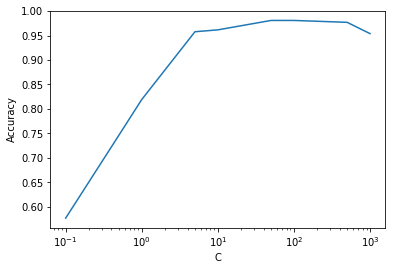

In [10]:
C_values=[0.1,0.5,1,5,10,50,100,500,1000]
acc_values=tuneC(C_values)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(C_values,acc_values)
plt.show()


We have more than 95% accuracy at C=10 and accuracy remains almost constant

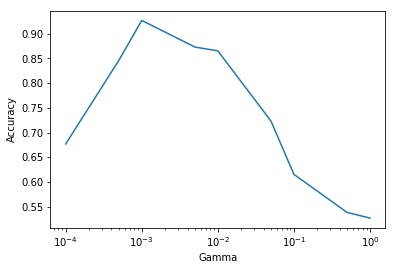

In [11]:
gamma_values=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
acc_values=tuneGamma(1,gamma_values)
plt.plot(gamma_values,acc_values)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

We achieve maximum accuracy around gamma=0.001

In [12]:
model = svm.SVC(kernel='rbf', C=10, gamma=0.001)
model.fit(train_features_matrix, train_labels)
predicted_labels = model.predict(test_features_matrix)
#print("FINISHED classifying. accuracy score : ")
print(accuracy_score(test_labels, predicted_labels))

0.9730769230769231


### Part 5: Performance Metrics for SVM
- Confusion Matrix
- ROC Curve, Precision-Recall curve

Following functions have been borrowed from https://scikit-learn.org
- plot_confusion_matrix
- plot_roc_curve
- plot_precision_recall_curve



In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[126   4]
 [  3 127]]


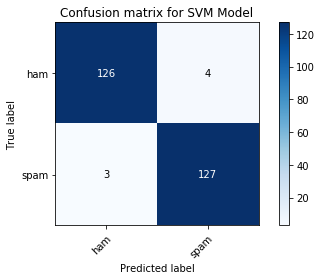

In [14]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_labels, predicted_labels, classes=['ham','spam'],
                      title='Confusion matrix for SVM Model')
plt.show()

<Figure size 432x288 with 0 Axes>

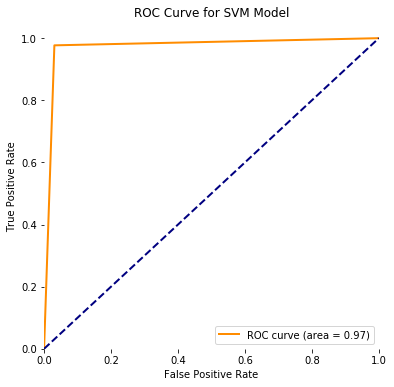

In [15]:
def plot_roc_curve(test_labels, predicted_labels,title='Receiver operating characteristic'):
    fpr, tpr, _ = roc_curve(test_labels, predicted_labels)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.box(on=None)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.frameon=False
    plt.show()
plot_roc_curve(test_labels, predicted_labels,"ROC Curve for SVM Model")

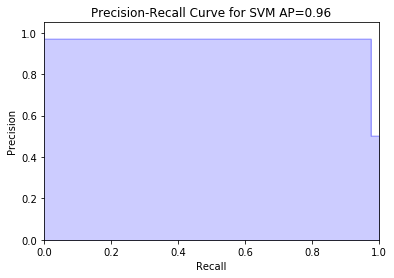

In [16]:
def plot_precision_recall_curve(test_labels, predicted_labels,title='Precision-Recall Curve'):
    average_precision = average_precision_score(test_labels, predicted_labels)
    precision, recall, _ = precision_recall_curve(test_labels, predicted_labels)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title+' AP={0:0.2f}'.format(
          average_precision))
    plt.show()
plot_precision_recall_curve(test_labels, predicted_labels,"Precision-Recall Curve for SVM")

## Part 6: Model Fitting for Naive Bayes


In [17]:
model = GaussianNB()
model.fit(train_features_matrix, train_labels)
predicted_labels_nb = model.predict(test_features_matrix)
print(accuracy_score(test_labels, predicted_labels_nb))

0.9615384615384616


## Part 7: Performance Metrics for Naive Bayes

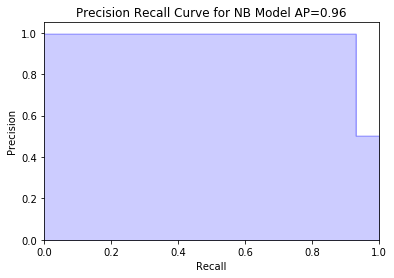

In [18]:
plot_precision_recall_curve(test_labels, predicted_labels_nb,title='Precision Recall Curve for NB Model')

<Figure size 432x288 with 0 Axes>

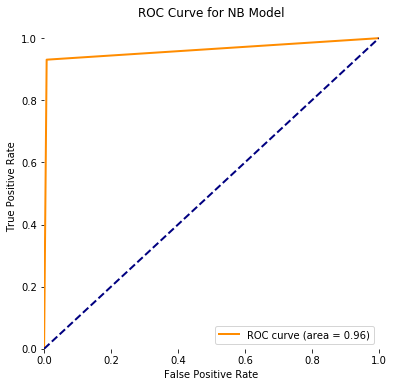

In [19]:
plot_roc_curve(test_labels, predicted_labels_nb,title='ROC Curve for NB Model')

Confusion matrix, without normalization
[[129   1]
 [  9 121]]


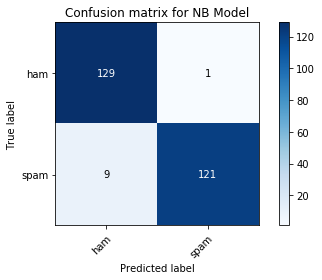

In [20]:
plot_confusion_matrix(test_labels, predicted_labels_nb, classes=['ham','spam'],
                      title='Confusion matrix for NB Model')
plt.show()